## Voice Gender Recognition Using Classical Machine Learning

### Project Overview
This project aims to build a machine learning model that predicts the gender of a speaker based on voice samples. The dataset contains audio features extracted from voice recordings, and the goal is to classify each sample as either male or female.

### Why This Project Is Unique
- Combines audio signal processing with supervised classification.
- Demonstrates classical machine learning techniques on audio features.
- Explores data preprocessing, outlier removal, feature scaling, and hyperparameter tuning.

### Concepts Covered
- Exploratory Data Analysis (EDA)
- Outlier detection and removal using the Interquartile Range (IQR) method
- Feature scaling (Standardization)
- Model training and evaluation using Logistic Regression, Support Vector Machines (SVM), and Random Forests
- Hyperparameter tuning with GridSearchCV and cross-validation

### Dataset Download Link
- https://www.kaggle.com/datasets/primaryobjects/voicegender
---

Let's get started!


## 📝 1. Import Libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Optional
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# pip install numpy pandas matplotlib seaborn scikit-learn

## 📥 2. Load Data

In [2]:
# Load the dataset
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 📊 3. Initial Data Exploration

In [3]:
# Basic stats and info
print("Dataset shape:")
df.shape

Dataset shape:


(3168, 21)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
# Check for missing values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df = df.drop_duplicates(keep = 'last')

In [8]:
# Convert label to numeric
df['label'] = df['label'].map({'male': 0, 'female': 1})

In [9]:
# Check for extreme values 'min', 'max'
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3166.0,0.180886,0.029916,0.039363,0.163649,0.184814,0.199118,0.251124
sd,3166.0,0.057130,0.016656,0.018363,0.041942,0.059162,0.067023,0.115273
median,3166.0,0.185593,0.036354,0.010975,0.169578,0.190016,0.210588,0.261224
Q25,3166.0,0.140440,0.048687,0.000229,0.111086,0.140255,0.175931,0.247347
Q75,3166.0,0.224748,0.023636,0.042946,0.208740,0.225668,0.243640,0.273469
IQR,3166.0,0.084308,0.042790,0.014558,0.042538,0.094280,0.114168,0.252225
skew,3166.0,3.140895,4.241768,0.141735,1.649353,2.197623,2.932527,34.725453
kurt,3166.0,36.587139,134.969236,2.068455,5.666817,8.327893,13.649803,1309.612887
sp.ent,3166.0,0.895144,0.044988,0.738651,0.861823,0.901823,0.928717,0.981997
sfm,3166.0,0.408348,0.177476,0.036876,0.258126,0.396472,0.533795,0.842936


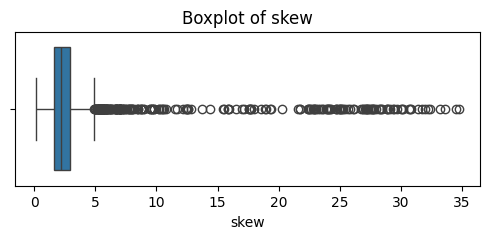

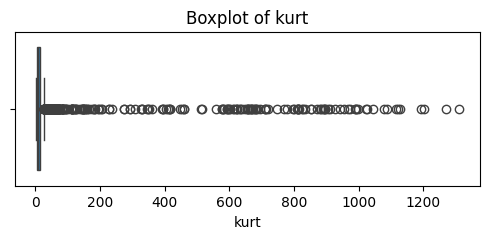

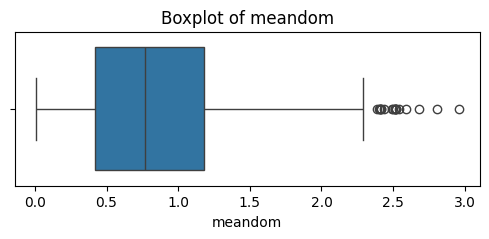

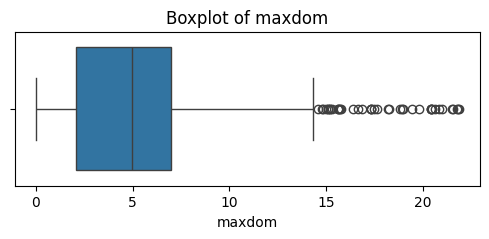

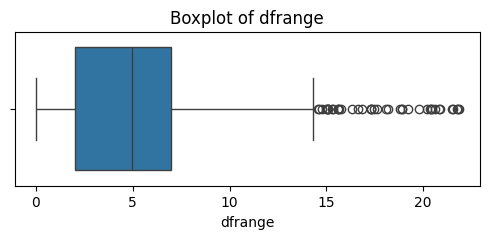

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

outlier_features = ['skew', 'kurt', 'meandom', 'maxdom', 'dfrange']

for col in outlier_features:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## 🧹 4. Outlier Removal Using IQR

In [11]:
# Apply IQR filtering
df_filtered = df.copy()
for col in outlier_features:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

# Output result
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")

Original shape: (3166, 21)
Filtered shape: (2717, 21)


## 📈 5. Exploratory Data Analysis (EDA)

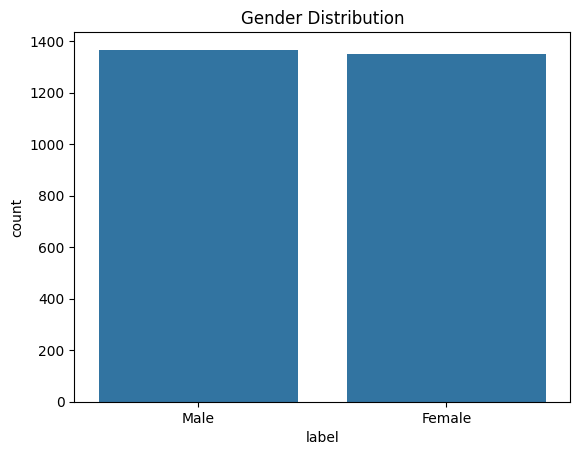

In [12]:
# Class distribution
sns.countplot(x='label', data=df_filtered)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

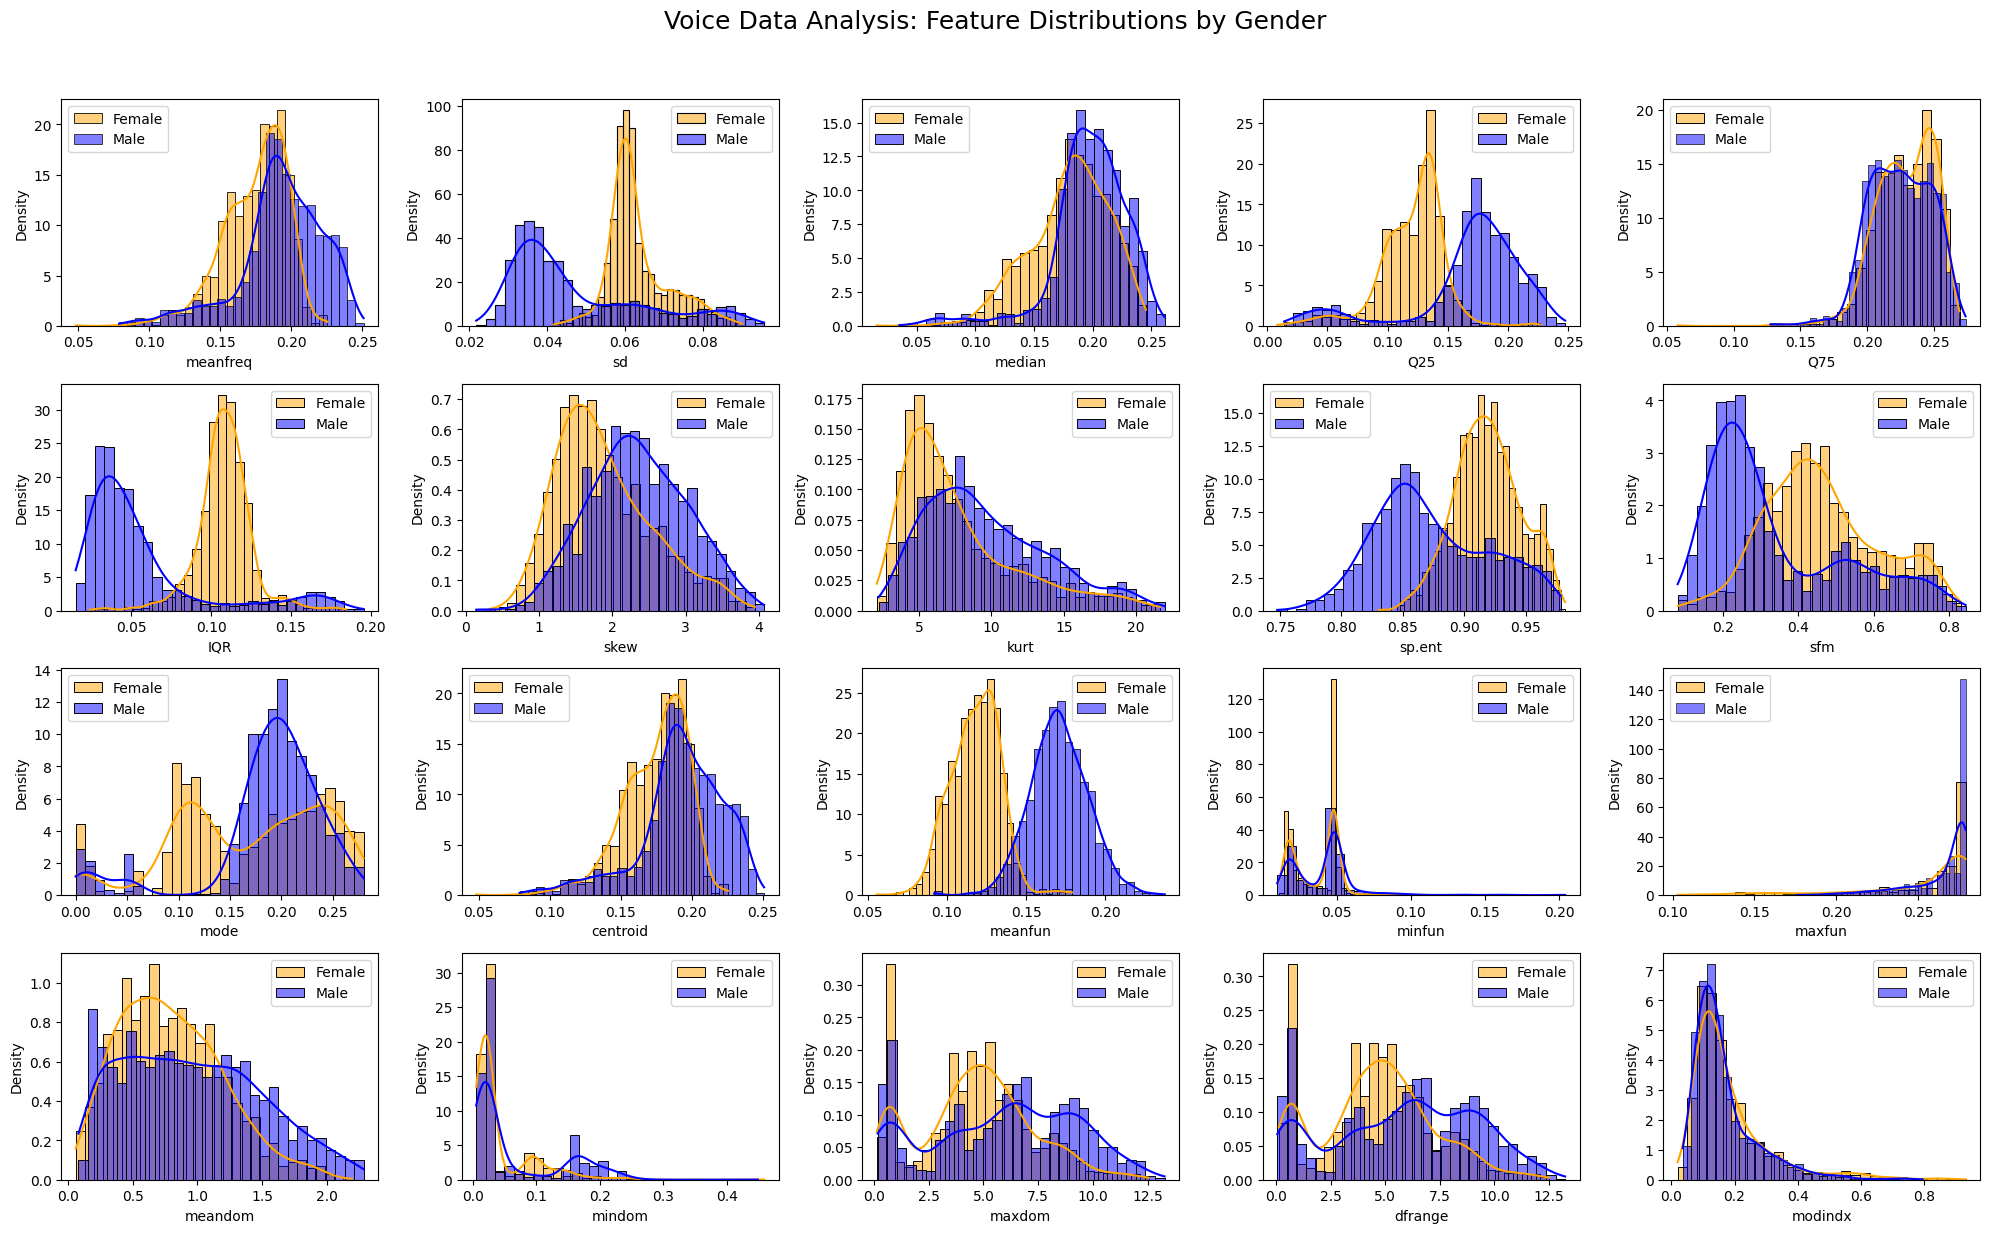

In [13]:
# Distribution plots of all features by gender
fig = plt.figure(figsize=(20, 15))
j = 0
for i in df_filtered.drop('label', axis=1).columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.histplot(df_filtered[i][df_filtered['label']==0], color='orange', label='Female', kde=True, stat='density', bins=30)
    sns.histplot(df_filtered[i][df_filtered['label']==1], color='blue', label='Male', kde=True, stat='density', bins=30)
    plt.legend(loc='best')
    plt.tight_layout()
fig.suptitle('Voice Data Analysis: Feature Distributions by Gender', fontsize=18)
fig.subplots_adjust(top=0.92)
plt.show()

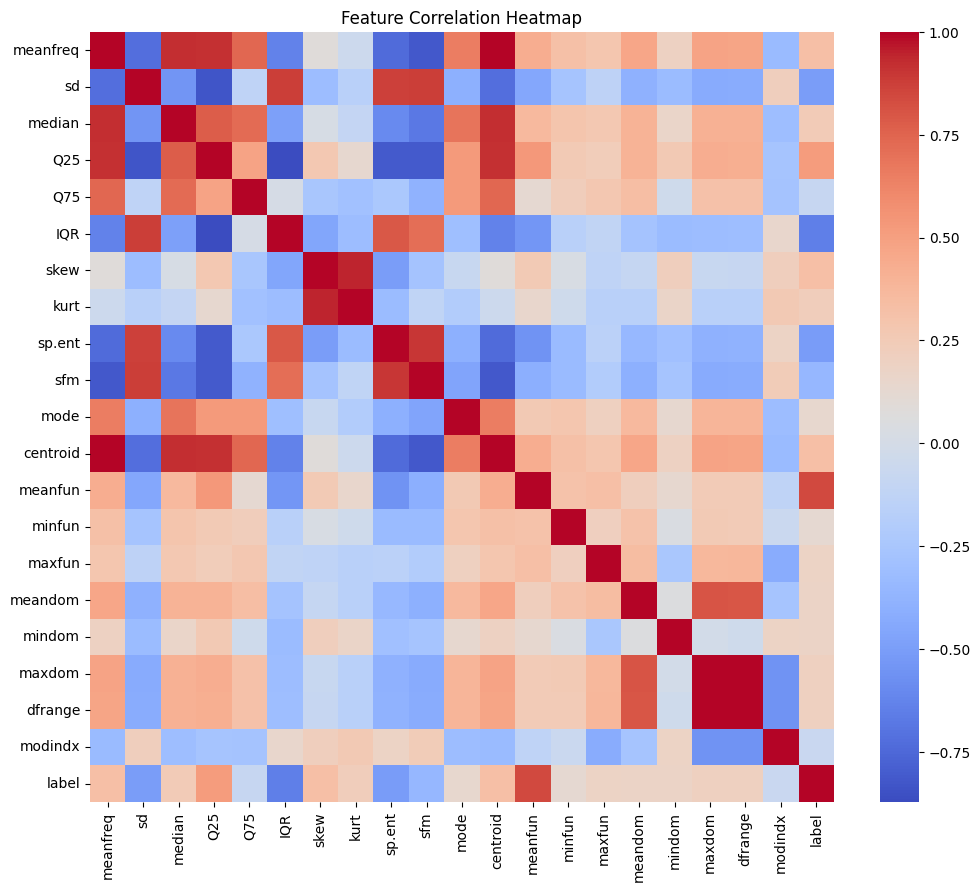

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
df_filtered.corr()['label'].apply(lambda x: abs(x)).sort_values(ascending=True).iloc[1:21][::-1]

label       1.000000
meanfun     0.840435
IQR         0.646148
Q25         0.522482
sp.ent      0.512828
sd          0.504457
sfm         0.354408
skew        0.331983
centroid    0.328872
meanfreq    0.328872
median      0.249899
kurt        0.231477
maxdom      0.206617
dfrange     0.202866
maxfun      0.186674
meandom     0.178859
mindom      0.175129
mode        0.140169
minfun      0.124690
Q75         0.087969
Name: label, dtype: float64

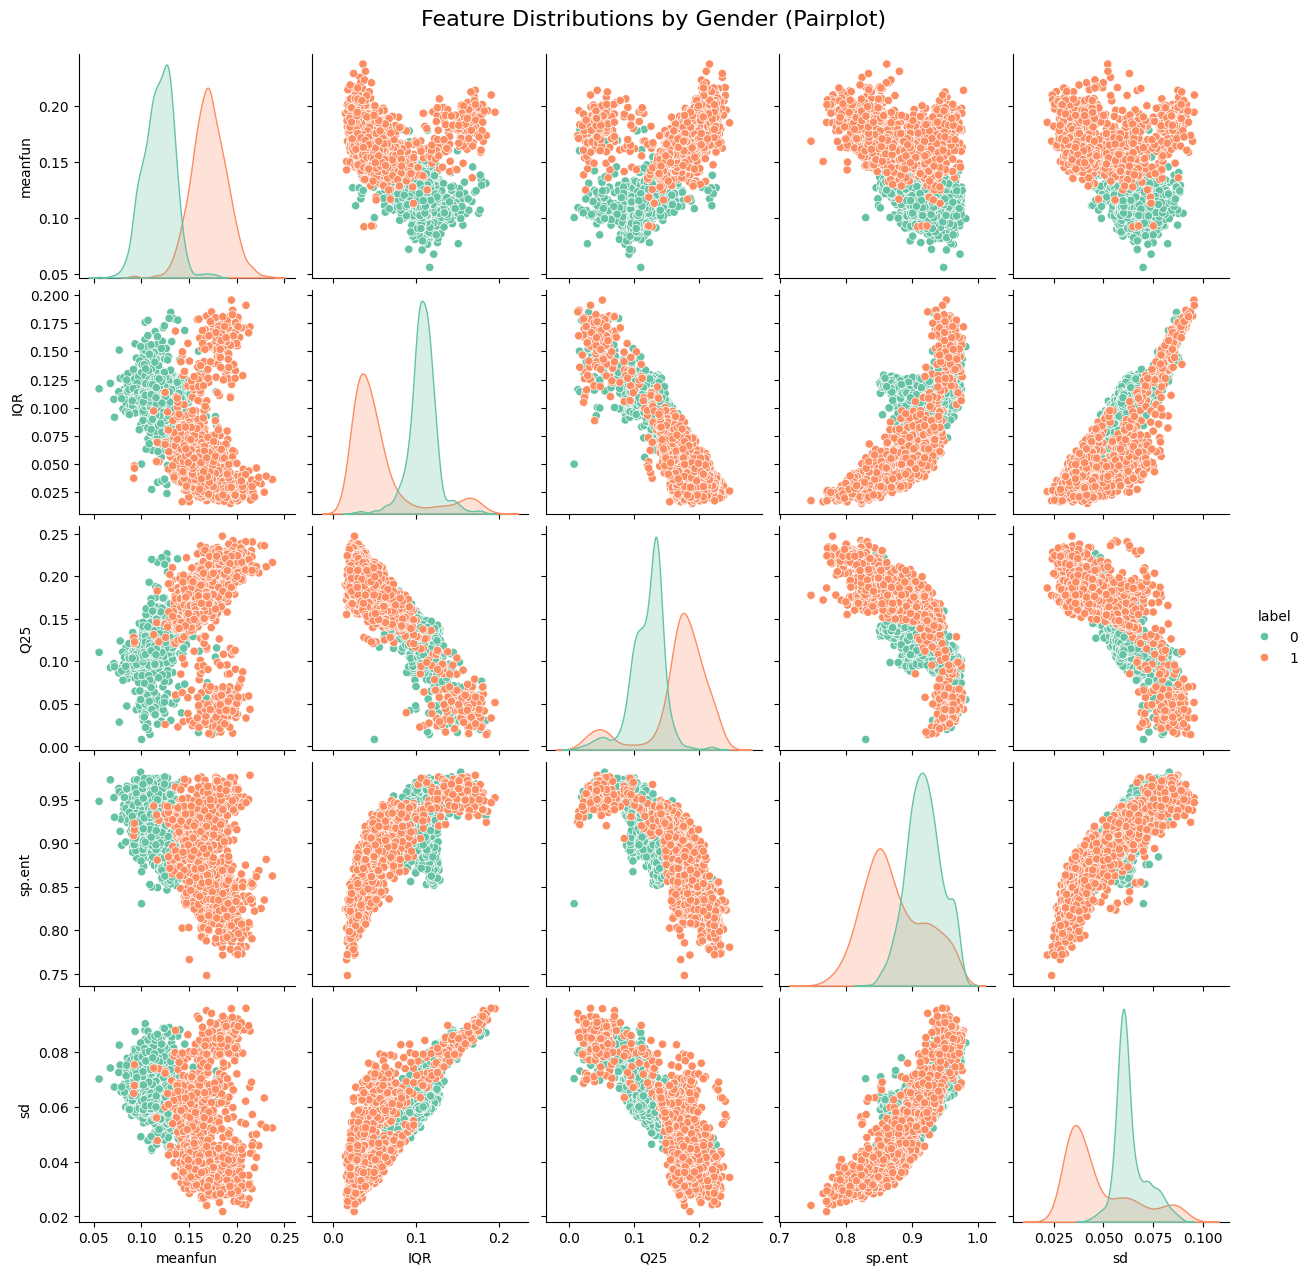

In [16]:
# Pairplot for EDA (on top correlated features)
top_features = ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']
sns.pairplot(df_filtered[top_features + ['label']], hue='label', palette='Set2')
plt.suptitle("Feature Distributions by Gender (Pairplot)", y=1.02, fontsize=16)
plt.show()

## ⚙️ 6. Feature Scaling & Train-Test Split

In [17]:
# Split into features and target
X = df_filtered.drop('label', axis=1)
y = df_filtered['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 🔍 7. Model Training (Baseline)

In [18]:
# Define Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Base SVM Results:
Accuracy: 0.9871323529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       274
           1       0.98      0.99      0.99       270

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544



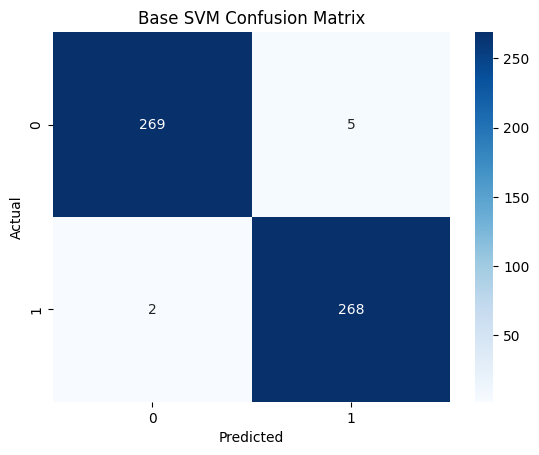


Base Random Forest Results:
Accuracy: 0.9834558823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       274
           1       0.98      0.99      0.98       270

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544



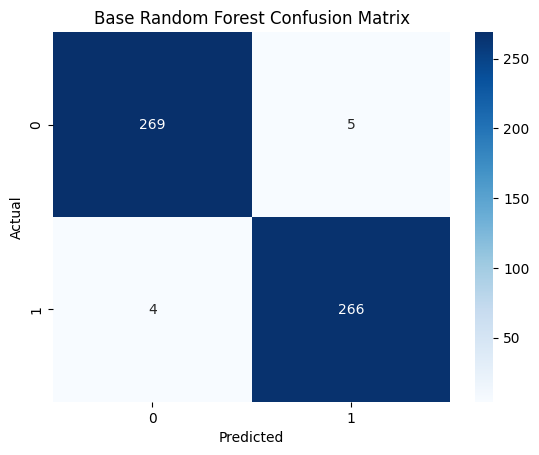


Base Logistic Regression Results:
Accuracy: 0.9834558823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       274
           1       0.99      0.98      0.98       270

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544



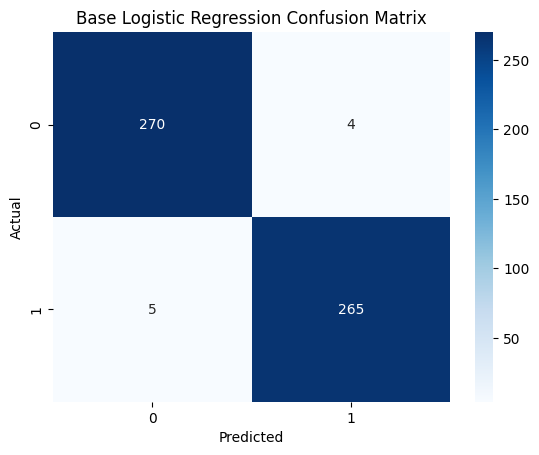

In [19]:
# Support Vector Classifier
svm = SVC()
svm.fit(X_train, y_train)
evaluate_model("Base SVM", y_test, svm.predict(X_test))

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model("Base Random Forest", y_test, rf.predict(X_test))

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluate_model("Base Logistic Regression", y_test, lr.predict(X_test))

## 🔍 8. Hyperparameter Tuning & Cross-Validation

In [20]:
# Hyperparameter Tuning Function
def tune_model(model, param_grid, X, y):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Best Cross-Validated Accuracy: {grid.best_score_:.4f}")
    return grid.best_estimator_

Tuning SVM...
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.9784

Tuned SVM Results:
Accuracy: 0.9871323529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       274
           1       0.99      0.99      0.99       270

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544



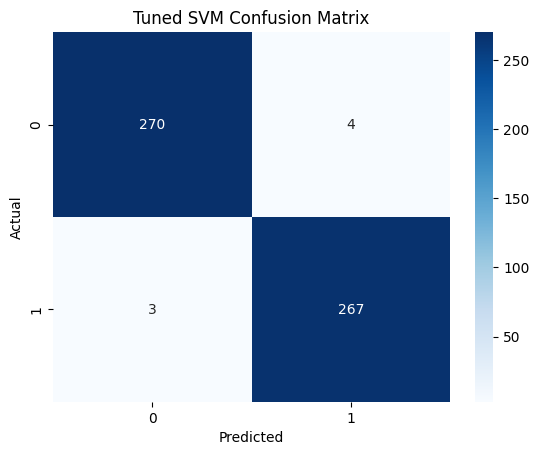

In [21]:
# Tune SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

print("Tuning SVM...")
best_svm = tune_model(SVC(), svm_params, X_train, y_train)
evaluate_model("Tuned SVM", y_test, best_svm.predict(X_test))

Tuning Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.9788

Tuned Random Forest Results:
Accuracy: 0.9852941176470589
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       274
           1       0.98      0.99      0.99       270

    accuracy                           0.99       544
   macro avg       0.99      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544



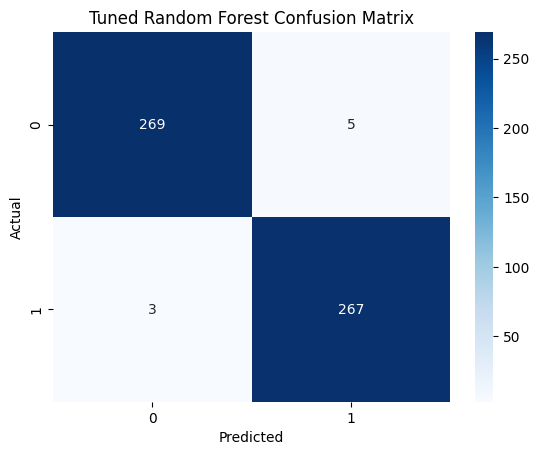

In [22]:
# Tune Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Tuning Random Forest...")
best_rf = tune_model(RandomForestClassifier(random_state=42), rf_params, X_train, y_train)
evaluate_model("Tuned Random Forest", y_test, best_rf.predict(X_test))

Tuning Logistic Regression...
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.9715

Tuned Logistic Regression Results:
Accuracy: 0.9834558823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       274
           1       0.99      0.98      0.98       270

    accuracy                           0.98       544
   macro avg       0.98      0.98      0.98       544
weighted avg       0.98      0.98      0.98       544



/Users/udaybhan/Jupyter Works/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/udaybhan/Jupyter Works/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/udaybhan/Jupyter Works/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/udaybhan/Jupyter Works/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/udaybhan/Jupyter Works/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/udaybhan/Jupyter Works/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users

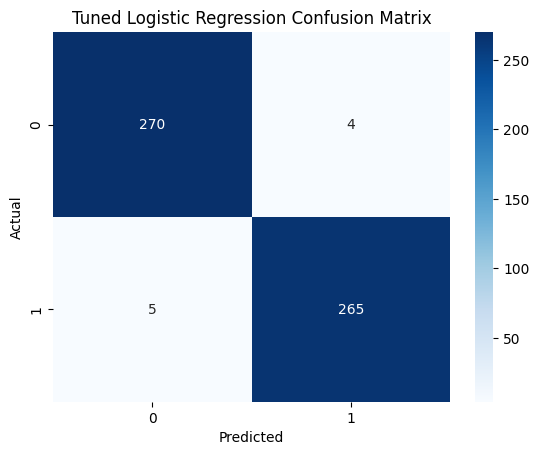

In [23]:
# Tune Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

print("Tuning Logistic Regression...")
best_lr = tune_model(LogisticRegression(max_iter=1000), lr_params, X_train, y_train)
evaluate_model("Tuned Logistic Regression", y_test, best_lr.predict(X_test))

In [24]:
# Cross-Validation Scores
def print_cv_score(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

print("\nCross-validation scores for tuned models:")
print("SVM:")
print_cv_score(best_svm, X_scaled, y)
print("Random Forest:")
print_cv_score(best_rf, X_scaled, y)
print("Logistic Regression:")
print_cv_score(best_lr, X_scaled, y)


Cross-validation scores for tuned models:
SVM:
Cross-Validation Accuracy: 0.9555 ± 0.0277
Random Forest:
Cross-Validation Accuracy: 0.9643 ± 0.0179
Logistic Regression:
Cross-Validation Accuracy: 0.9665 ± 0.0168


## ⚙️ 9. Feature Importance

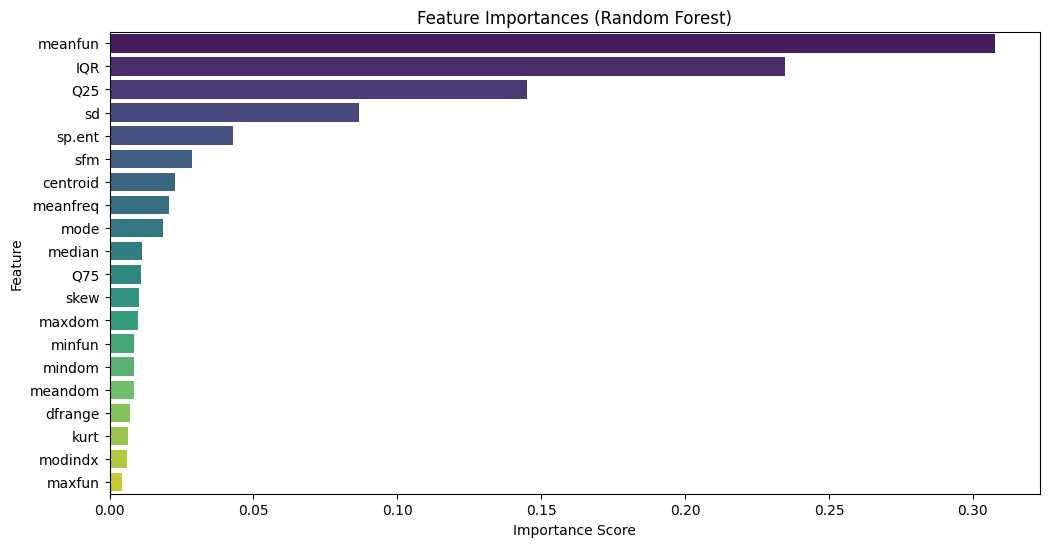

In [25]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12,6))
plt.title("Feature Importances (Random Forest)")
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## 📌 8. Final Notes
- Logistic Regression, SVM, and Random Forest all perform well on voice-based gender classification.
- Outlier removal using IQR helped improve stability and generalization.
- Hyperparameter tuning with GridSearchCV was crucial for optimizing each model.